<a href="https://colab.research.google.com/github/fatazeouedraogo/Deep-Learning-for-Healthcare-Brain-Tumor-Classification-using-VGG16/blob/main/Learning-for-Healthcare-Brain-Tumor-Classification-using-.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Dowload via API

In [ ]:
from google.colab import files
uplodeded = files.upload()

for fn in uplodeded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uplodeded[fn])))

!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json



Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 71 bytes


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


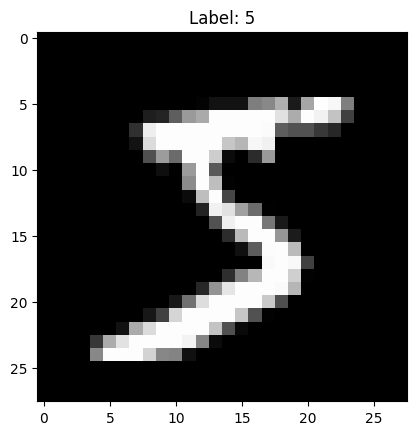

In [ ]:
from tensorflow.keras.datasets import mnist
(X_train , y_train), (X_test, y_test) = mnist.load_data()

#Data download
X_train = X_train /225.0
X_test = X_test /255.0


import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()


# Model building

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

model = Sequential([
    # Couches convolutives
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Classificateur
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes (chiffres 0-9)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


#history = model.fit(X_train.reshape(-1, 28, 28, 1), y_train,
                    #epochs=5,
                    #validation_data=(X_test.reshape(-1, 28, 28, 1), y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 32ms/step - accuracy: 0.9159 - loss: 0.2834 - val_accuracy: 0.9816 - val_loss: 0.0515
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.9861 - loss: 0.0420 - val_accuracy: 0.9849 - val_loss: 0.0452
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9914 - loss: 0.0261 - val_accuracy: 0.9897 - val_loss: 0.0340
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9946 - loss: 0.0182 - val_accuracy: 0.9864 - val_loss: 0.0414
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - accuracy: 0.9960 - loss: 0.0132 - val_accuracy: 0.9918 - val_loss: 0.0292
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9973 - loss: 0.0085 - val_accuracy: 0.9902 - val_loss: 0.0313
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9974 - loss: 0.0075 - val_accuracy: 0.9912 - val_loss: 0.0287
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9979 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9893 - loss: 0.0454
Test accuracy: 0.9911999702453613


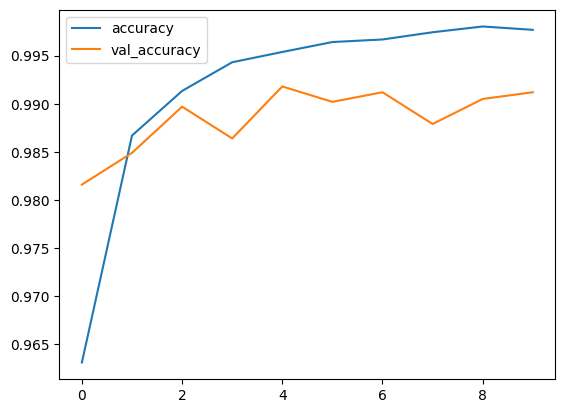

In [ ]:
test_loss ,test_acc =model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

# Prediction

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

# Chargement des données
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalisation (valeurs entre 0 et 1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Dimensions des données
print("Forme des données d'entraînement :", X_train.shape)  # (60000, 28, 28)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Forme des données d'entraînement : (60000, 28, 28)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Prediction: 2 (True label: 9)
Prediction: 8 (True label: 2)
Prediction: 0 (True label: 1)
Prediction: 8 (True label: 1)
Prediction: 1 (True label: 6)


In [ ]:
import numpy as np

def read_images(path):
    with open(path, 'rb') as f:
        magic, num = np.frombuffer(f.read(8), dtype='>i4', count=2)
        images = np.frombuffer(f.read(), dtype=np.uint8).reshape(num, 28, 28)
    return images

# Exemple (remplacez par vos chemins)
X_train = read_images(path="/content/MyDrive/train-images-idx3-ubyte")
y_train = read_images("/content/MyDrive/train-labels-idx1-ubyte")

FileNotFoundError: [Errno 2] No such file or directory: '/content/MyDrive/train-images-idx3-ubyte'